# Свёрточные нейронные сети. Часть 1.

## Переключение версии TensorFlow

In [4]:
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


In [244]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import imageio

import tensorflow as tf

## Загрузка и подготовка датасета MNIST

In [83]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()
# указываем размер batch (какой объем данных используем для вычисления) = -1 (вычислить самостоятельно), то есть брать все 
# нам всегда нужно иметь канальное измерение, хотя у нас картинка черно-белая мы все равно явно указываем, что канал = 1
train_x = train_x.reshape(-1, 32, 32, 3).astype(np.float32) / 255. 
test_x = test_x.reshape(-1, 32, 32, 3).astype(np.float32) / 255.

print(train_x.shape, train_x.dtype)
print(test_x.shape, test_x.dtype)
print(train_y.shape, train_y.dtype)
print(test_y.shape, test_y.dtype)

(50000, 32, 32, 3) float32
(10000, 32, 32, 3) float32
(50000, 1) uint8
(10000, 1) uint8


## Визуализация датасета MNIST

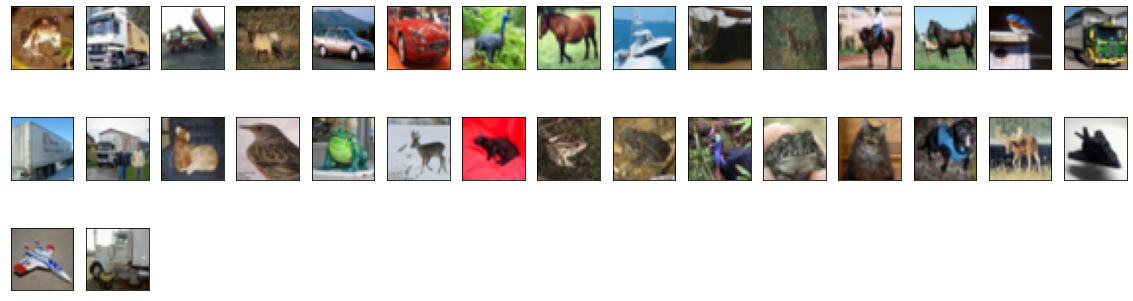

In [84]:
some_samples = train_x[:32, ...]

fig = plt.figure(figsize=(20, 20))
for j in range(some_samples.shape[0]):
    ax = fig.add_subplot(10, 15, j+1)
    ax.imshow(some_samples[j,:,:,:])
    plt.xticks([]), plt.yticks([])
plt.show()

## Создание модели CNN

In [219]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

## Подготовка к обучению

In [220]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Обучение модели

In [221]:
NUM_EPOCHS = 15

model.fit(train_x, train_y, epochs=NUM_EPOCHS)

Epoch 1/15
1563/1563 [==============================] - 274s 175ms/step - loss: 1.5593 - accuracy: 0.4300
Epoch 2/15
1563/1563 [==============================] - 265s 169ms/step - loss: 1.1597 - accuracy: 0.5873
Epoch 3/15
1563/1563 [==============================] - 266s 170ms/step - loss: 1.0064 - accuracy: 0.6479
Epoch 4/15
1563/1563 [==============================] - 259s 166ms/step - loss: 0.9101 - accuracy: 0.6791
Epoch 5/15
1563/1563 [==============================] - 266s 170ms/step - loss: 0.8536 - accuracy: 0.6986
Epoch 6/15
1563/1563 [==============================] - 280s 179ms/step - loss: 0.8046 - accuracy: 0.7182
Epoch 7/15
1563/1563 [==============================] - 263s 168ms/step - loss: 0.7640 - accuracy: 0.7325
Epoch 8/15
1563/1563 [==============================] - 262s 168ms/step - loss: 0.7260 - accuracy: 0.7458
Epoch 9/15
1563/1563 [==============================] - 265s 170ms/step - loss: 0.6889 - accuracy: 0.7576
Epoch 10/15
1563/1563 [=======================

## Оценка качества модели

In [222]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 7s 23ms/step - loss: 0.7910 - accuracy: 0.7384


[0.7910318970680237, 0.7383999824523926]

## Пример инференса модели

In [223]:
sample = test_x[0, ...]
prediction = model(sample[None, ...])[0]
print(prediction)

tf.Tensor(
[8.4491265e-05 1.3419649e-06 4.7652233e-05 9.4320405e-01 9.3481967e-06
 4.9411695e-02 5.5087982e-03 9.9771787e-06 1.7203850e-03 2.1243086e-06], shape=(10,), dtype=float32)


## Функция для инференса и отображения результата предсказания

In [224]:
# setting class names
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [238]:
def test_picture(sample):
    
    prediction = model(sample[None, ...])[0]
    ans = np.argmax(prediction)
    
    fig = plt.figure(figsize=(15,7))

    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(sample[:,:,:])
    plt.xticks([]), plt.yticks([])

    ax = fig.add_subplot(1, 2, 2)
    bar_list = ax.bar(class_names, prediction, align='center')
    bar_list[ans].set_color('g')
    ax.set_xticks(np.arange(10))
    ax.set_xlim([-1, 10])
    ax.grid(True)

    plt.show()
    
    print('Predicted number: {}'.format(class_names[ans]))

## Запуск предсказания для изображения случайной цифры из MNIST

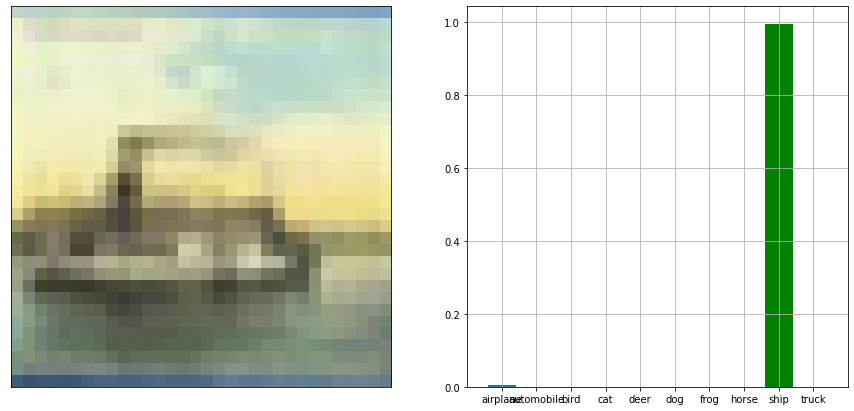

Predicted number: ship
True Answer: ship


In [233]:
import random
idx = random.randint(0, test_x.shape[0])
sample = test_x[idx, ...]
test_picture(sample)

print('True Answer: {}'.format(class_names[test_y[idx][0]]))

## Запуск предсказания на нашем изображении

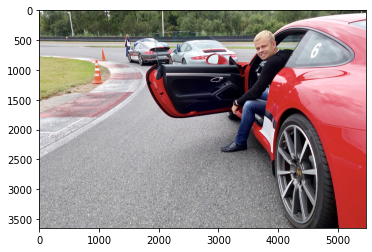

In [246]:
img = imageio.imread('./DSC05167.jpeg')
plt.imshow(img)

In [256]:
def load_and_prepare_image(fpath):
    import imageio
    from skimage.transform import resize
    img = imageio.imread(fpath, pilmode="RGB")
    img = img.astype(np.float32)/255
    img = resize(img, (32, 32), mode='reflect')#,order=3,  anti_aliasing=True
    img = (1. - img).astype(np.float32)
    img = np.mean(img, axis=2)
    img = np.reshape(img, (32, 32, 3))
    return img

In [257]:
img = load_and_prepare_image('./DSC05167.jpeg')
test_picture(img)

ValueError: cannot reshape array of size 1024 into shape (32,32,3)